<div style="text-align: center; direction: rtl; font-family: Arial, sans-serif;">
  <h1 style="color: #003366; font-size: 36px;">פרויקט ניתוח נתונים</h1>
  <h2 style="color: #3399FF; font-size: 28px;">🎓קבוצה מס' 12 – הגורמים המשפיעים על הצלחה בלימודים</h2>
</div>

<div>
  <center>
    <img src="https://raw.githubusercontent.com/yuval443/my_pro/refs/heads/main/61ytWFSOeML._AC_UF1000%2C1000_QL80_.jpg" width="500"/>
  </center> 
</div>


### Project team members: 
- `יובל ניסים`
- `נעם אורון`
- `עדי קמינצקי`

# Project Name: `גורמים המשפיעים על הצלחה לימודית`


### Project description: 
`ניתוח מידע שנאסף ממערכת נתוני תלמידים, במטרה להבין דפוסי הצלחה אקדמית. הנתונים כוללים שעות למידה שבועיות, הרגלי למידה, פעילויות חוץ-אקדמיות וסוגי תיכון. המידע מאפשר לבחון הבדלים בין קבוצות תלמידים שונות ולזהות גורמים המשפיעים על הישגים לימודיים.`

### Explain the data source:
`מערך הנתונים הזה מתמקד בהישגים אקדמיים של תלמידי תיכון בשיעורי השפה בשני בתי ספר בפורטוגל. הוא כולל 649 תלמידים עם 33 משתנים שונים לכל תלמיד.
 .`

### Link to the data: 
https://www.kaggle.com/datasets/larsen0966/student-performance-data-set


#### import:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import gaussian_kde

#### Read you file from Github:

In [10]:
file_name = "https://raw.githubusercontent.com/yuval443/my_pro/refs/heads/main/student-por%20(1).csv"
df = pd.read_csv(file_name)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [11]:
df['work_mom'] = np.where(df['Mjob'].isin(['teacher', 'other', 'services', 'health']), 1, 0)
df['work_dad'] = np.where(df['Fjob'].isin(['teacher', 'other', 'services', 'health']), 1, 0)
df['both_work'] = (df['work_mom'] == 1) & (df['work_dad'] == 1)

# המרה ל-0 ו-1 (כיוון שהתוצאה היא True/False, נבצע המרה ל-1/0)
df['both_work'] = df['both_work'].astype(int)


In [12]:
for col in ['G1', 'G2', 'G3']:
    if df[col].max() <= 20:
        df[col] = df[col] * 5

yes_no_columns = df.columns[df.isin(["yes", "no"]).any()]
df[yes_no_columns] = df[yes_no_columns].apply(lambda col: col.map({"yes": 1, "no": 0}))
df
yes_no_columns = df.columns[df.isin(["T", "A"]).any()]
df[yes_no_columns] = df[yes_no_columns].apply(lambda col: col.map({"T": 1, "A": 0}))
numeric_columns = df.select_dtypes(include=['number']).columns



<Axes: >

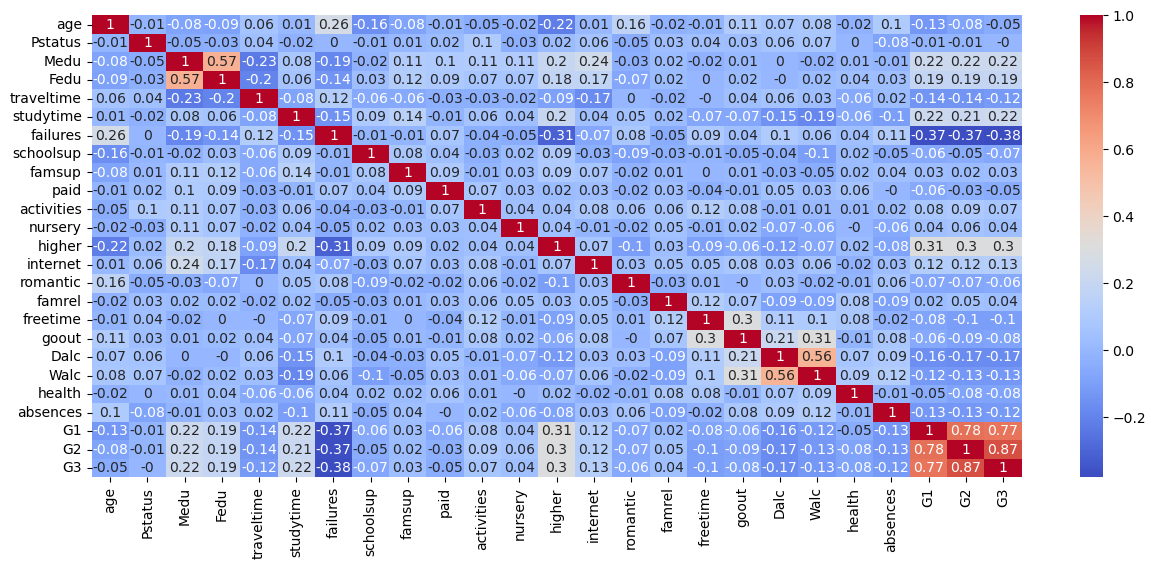

In [13]:
features = ['age', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3']
plt.figure(figsize=(15,6))
correlation_matrix = df[features].corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')


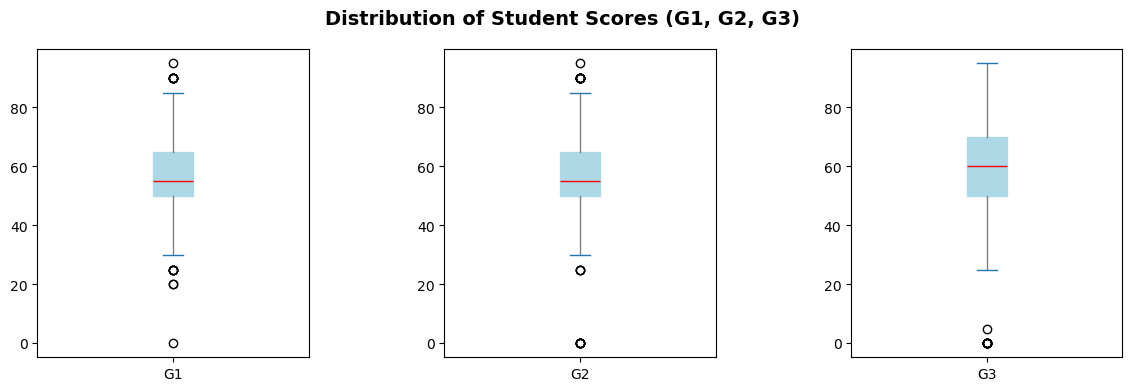

In [14]:

columns_of_interest = ['G1', 'G2', 'G3']
numeric_data = df[columns_of_interest].select_dtypes(include=np.number)


numeric_data.plot(subplots=True, layout=(1, len(columns_of_interest)), kind='box',
                  figsize=(14, 4), patch_artist=True,
                  color=dict(boxes='lightblue', whiskers='gray', medians='red'))

plt.suptitle('Distribution of Student Scores (G1, G2, G3)', fontsize=14, fontweight='bold')
plt.subplots_adjust(wspace=0.5)
plt.show()


# הסבר על שיטת חישוב הציונים

בנתוני המקור, ציוני התלמידים נעים בטווח של **0 עד 20**.

כדי להקל על ההבנה והשוואה, המרתנו את הציונים האלו לסולם מוכר יותר – **מ-0 עד 100**, כפי שמקובל בישראל ובמקומות נוספים.  

---

## טבלת השוואת ציונים בין סולמות 0-20 ו-0-100

| ציון בסולם 0–20 | ציון שקול בסולם 0–100 | הערכה חינוכית              |
|-----------------|-----------------------|----------------------------|
| 10              | 50                    | **ציון עובר (מינימום לעבור)** |
| 12              | 60                    | ציון עובר פלוס             |
| 15              | 75                    | ציון טוב                   |
| 18              | 90                    | ציון גבוה מאוד             |
| 20              | 100                   | ציון מושלם                 |


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 16px"> 
בניתוח החריגים בנתוני ציוני התלמידים G1, G2 ו-G3 ניתן לראות חריגים נמוכים של ציון 0 המייצגים תלמידים שנשרו מהקורס וחריגים גבוהים המייצגים תלמידים מצטיינים. החלטנו להשאיר את כל החריגים מכיוון שהם מייצגים תופעות חינוכיות אמיתיות שהסרתן תפגע בתוקפות הניתוח, ולהכפיל את הציונים ב-5 כדי להמיר אותם מהסקלה הפורטוגלית (0-20) לסקלה מוכרת יותר (0-100) תוך שמירה על היחסים הסטטיסטיים המקוריים.




</h5>

</div>

<div dir="rtl" style="font-family: 'Calibri', serif; line-height: 1.1; white-space: nowrap;">

## <span style="color: #D68E6B; font-size: 31px; font-weight: bold;">שאלת ניתוח ראשונה- השפעת תנאי מחיה על הצלחות התלמידים</span>

</div>
<div>
<center><img src="https://raw.githubusercontent.com/yuval443/my_pro/refs/heads/main/OIG3._Q6Hc6R3ZHGN_f.jpg" width="500"/></center> 
</div>



<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 16px"> 
בשאלת הניתוח הראשונה נרצה לבדוק כיצד גורמים סביבתיים שאינם תלויים בתלמיד - כמו השכלת ההורים, עבודתם וזמן הנסיעה לבית הספר - משפיעים על ביצועיו האקדמיים. מטרת הניתוח היא לזהות פערים במערכת החינוך הנובעים מרקע סוציו-אקונומי ונגישות פיזית לבית הספר, ולהבין האם תלמידים נמצאים במצב נחות בגלל נסיבות חיצוניות שאינן תלויות בהם.






</h5>

</div>

<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> מצב תעסוקה של ההורים</h5>

</div>


C:\Users\Ilan\AppData\Local\Temp\ipykernel_10436\1734179271.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Grade_Range', 'Parents_Work_Status']).size().unstack(fill_value=0)


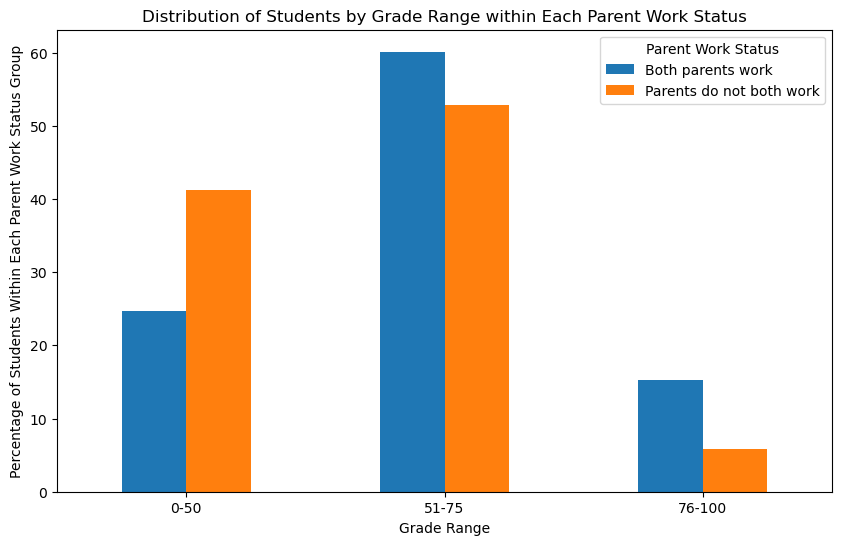

In [78]:

df['work_mom'] = np.where(df['Mjob'].isin(['teacher', 'other', 'services', 'health']), 1, 0)
df['work_dad'] = np.where(df['Fjob'].isin(['teacher', 'other', 'services', 'health']), 1, 0)
df['both_work'] = ((df['work_mom'] == 1) & (df['work_dad'] == 1)).astype(int)


df['Parents_Work_Status'] = np.where(df['both_work'] == 1, 'Both parents work', 'Parents do not both work')


bins = [0, 50, 75, 100]
labels = ['0-50', '51-75', '76-100']
df['Grade_Range'] = pd.cut(df['G3'], bins=bins, labels=labels, right=True)


grouped = df.groupby(['Grade_Range', 'Parents_Work_Status']).size().unstack(fill_value=0)


percentages = grouped.divide(grouped.sum(axis=0), axis=1) * 100


percentages.plot(kind='bar', figsize=(10,6))
plt.ylabel('Percentage of Students Within Each Parent Work Status Group')
plt.xlabel('Grade Range')
plt.title('Distribution of Students by Grade Range within Each Parent Work Status')
plt.legend(title='Parent Work Status')
plt.xticks(rotation=0)
plt.show()

C:\Users\Ilan\AppData\Local\Temp\ipykernel_10436\802487432.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Mjob", y="G3_scaled", data=df, palette="viridis", ci=None, hue="Fjob" )


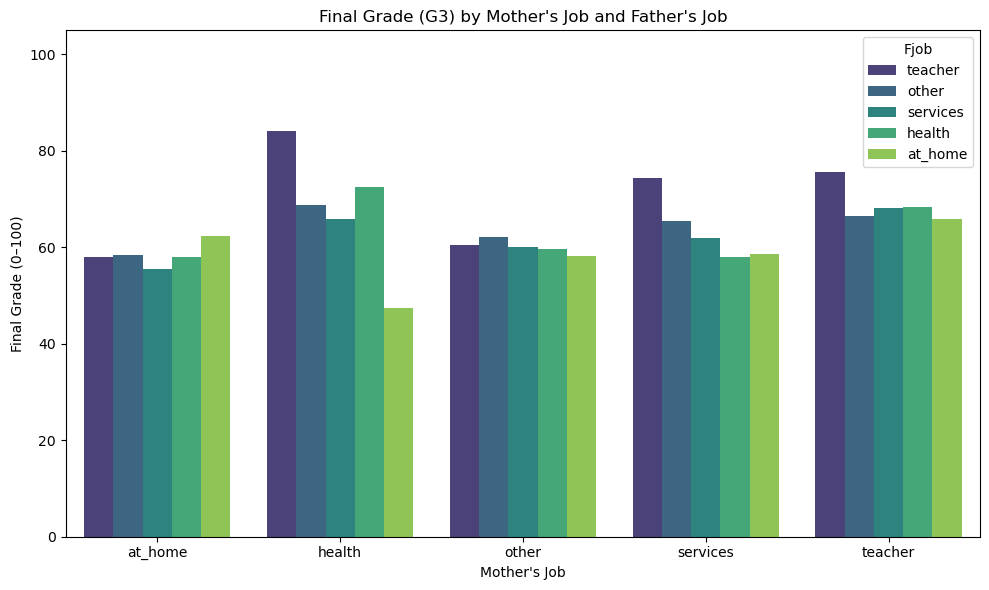

C:\Users\Ilan\AppData\Local\Temp\ipykernel_10436\802487432.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


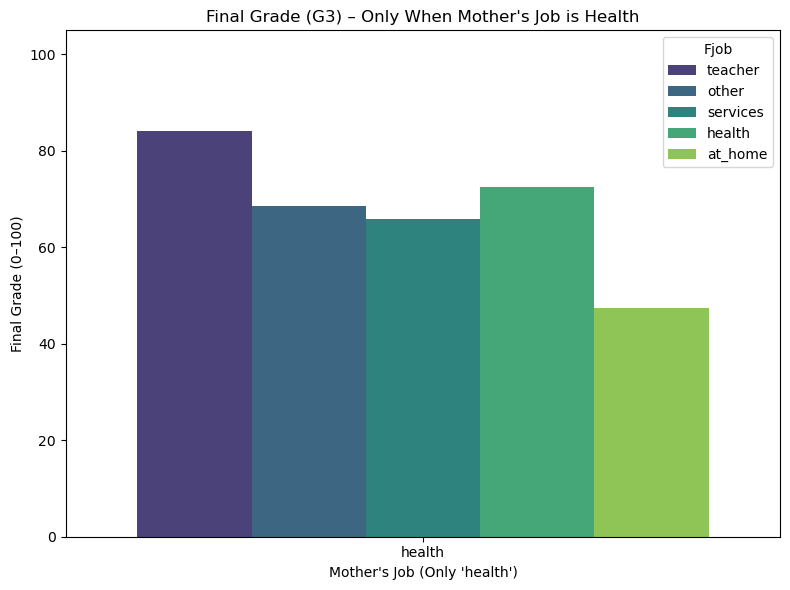

In [21]:
yes_no_columns = df.columns[df.isin(["yes", "no"]).any()]
df[yes_no_columns] = df[yes_no_columns].apply(lambda col: col.map({"yes": 1, "no": 0}))
min_g3 = df['G3'].min()
max_g3 = df['G3'].max()
df['G3_scaled'] = (df['G3'] - min_g3) / (max_g3 - min_g3) * 100

plt.figure(figsize=(10,6))
sns.barplot(x="Mjob", y="G3_scaled", data=df, palette="viridis", ci=None, hue="Fjob" )

plt.title("Final Grade (G3) by Mother's Job and Father's Job")
plt.xlabel("Mother's Job")
plt.ylabel("Final Grade (0–100)")

plt.ylim(0, 105)
plt.tight_layout()
plt.show()

fjob_order = df["Fjob"].dropna().unique()


colors = sns.color_palette("viridis", n_colors=len(fjob_order))
color_dict = dict(zip(fjob_order, colors))


df_health_mom = df[df["Mjob"] == "health"]

plt.figure(figsize=(8,6))
sns.barplot(
    x="Mjob",
    y="G3_scaled",
    data=df_health_mom,
    hue="Fjob",
    palette=color_dict,
    hue_order=fjob_order,   
    ci=None
)

plt.title("Final Grade (G3) – Only When Mother's Job is Health")
plt.xlabel("Mother's Job (Only 'health')")
plt.ylabel("Final Grade (0–100)")

plt.ylim(0, 105)
plt.tight_layout()
plt.show()


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px">השכלה של ההורים</h5>

</div>


C:\Users\Ilan\AppData\Local\Temp\ipykernel_10436\268067642.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AvgEdu', y='G3_scaled', palette='Purples')


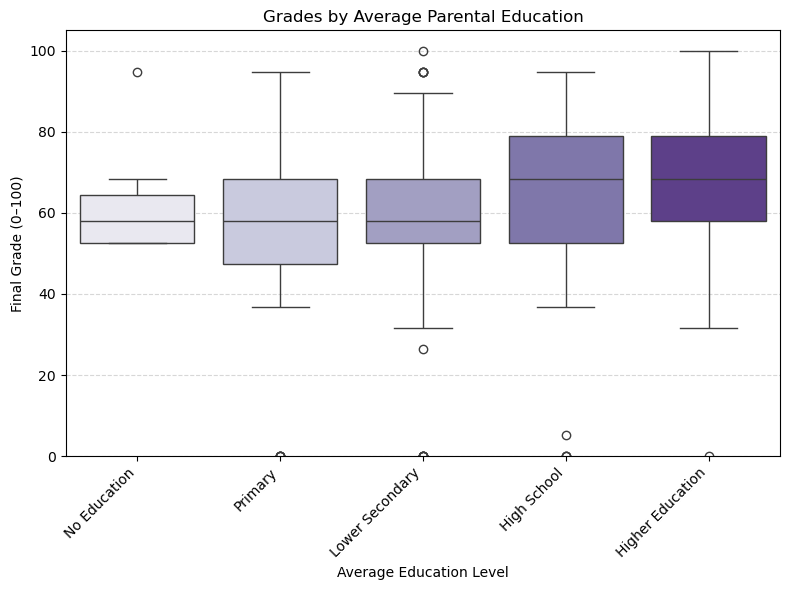

In [23]:

education_labels = {
    0: 'No Education',
    1: 'Primary',
    2: 'Lower Secondary',
    3: 'High School',
    4: 'Higher Education'}

min_g3 = df['G3'].min()
max_g3 = df['G3'].max()
df['G3_scaled'] = (df['G3'] - min_g3) / (max_g3 - min_g3) * 100

df['AvgEdu'] = ((df['Medu'] + df['Fedu']) / 2).round().astype(int)


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='AvgEdu', y='G3_scaled', palette='Purples')

plt.title("Grades by Average Parental Education")
plt.xlabel("Average Education Level")
plt.ylabel("Final Grade (0–100)")
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.xticks(ticks=list(education_labels.keys()),
           labels=[education_labels[k] for k in education_labels],
           rotation=45, ha='right')

plt.tight_layout()
plt.show()


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> זמן נסיעה לבית הספר</h5>

</div>


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 16px">הנתונים מראים שקיימים פערים משמעותיים בביצועים לימודיים הנובעים מגורמים סוציו-אקונומיים שאינם תלויים בתלמיד עצמו. התלמידים מרקע חזק יותר (הורים משכילים,הנתונים מרמזים על קשר אפשרי בין גורמים סוציו-אקונומיים לביצועים האקדמיים, כאשר תלמידים מרקע חזק יותר נוטים לבצועים טובים יותר. מעניין לציון שאפילו תוספת של 15 דקות נסיעה קשורה לירידה של 4 נקודות בממוצע, אם כי יש לבחון האם מדובר בקשר סיבתי. ממצאים אלה עשויים להצביע על צורך לשקול מדיניות חינוכית שתתמודד עם פערים אפשריים אלה.




</h5>

</div>

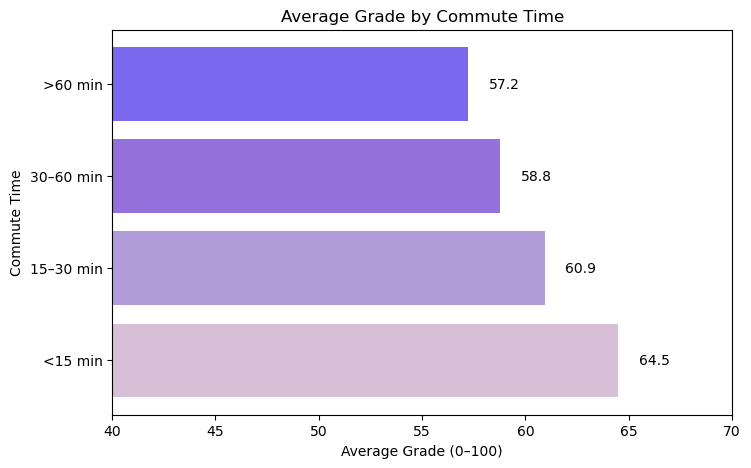

In [26]:

time_map = {1: '<15 min',2: '15–30 min',3: '30–60 min',4: '>60 min'}
df['traveltime_cat'] = df['traveltime'].map(time_map)
mean_scores = df.groupby('traveltime_cat')['G3_scaled'].mean().reset_index()
mean_scores = mean_scores.sort_values(by='G3_scaled')
colors = ['#7b68ee', '#9370db', '#b19cd9', '#d8bfd8']

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.barh(mean_scores['traveltime_cat'], mean_scores['G3_scaled'], color=colors)
ax.invert_yaxis()
ax.set_xlabel('Average Grade (0–100)')
ax.set_ylabel('Commute Time')
ax.set_title('Average Grade by Commute Time')
ax.set_xlim(40, 70)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center')

plt.show()


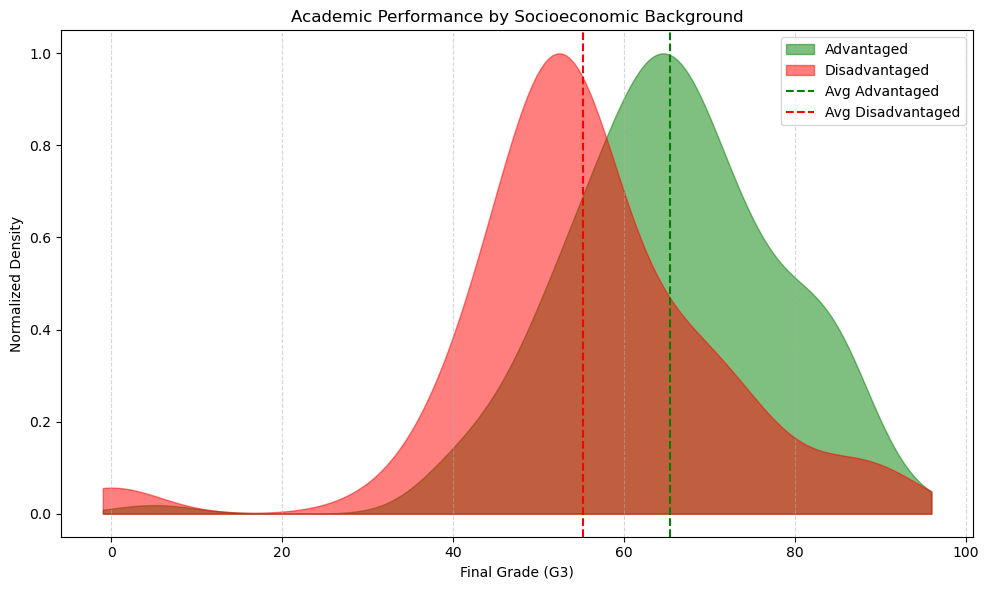

Advantaged students: 138
Disadvantaged students: 139


In [27]:

advantaged = df[
    (df['Mjob'] != 'at_home') & 
    (df['Fjob'] != 'at_home') & 
    (df['traveltime'] == 1) & 
    (df['Medu'] >= 3) & 
    (df['Fedu'] >= 3)
]

disadvantaged = df[
    (df['Mjob'] == 'at_home') | 
    (df['Fjob'] == 'at_home') & 
    (df['traveltime'] >= 2) & 
    (df['Medu'] < 3) & 
    (df['Fedu'] < 3)
]


adv_grades = advantaged['G3'].values
disadv_grades = disadvantaged['G3'].values


x = np.linspace(min(adv_grades.min(), disadv_grades.min()) - 1,
                max(adv_grades.max(), disadv_grades.max()) + 1, 200)

kde_adv = gaussian_kde(adv_grades)
kde_dis = gaussian_kde(disadv_grades)


y_adv = kde_adv(x) / kde_adv(x).max()
y_dis = kde_dis(x) / kde_dis(x).max()

plt.figure(figsize=(10, 6))
plt.fill_between(x, y_adv, color='green', alpha=0.5, label='Advantaged')
plt.fill_between(x, y_dis, color='red', alpha=0.5, label='Disadvantaged')

plt.axvline(adv_grades.mean(), color='green', linestyle='--', label='Avg Advantaged')
plt.axvline(disadv_grades.mean(), color='red', linestyle='--', label='Avg Disadvantaged')


plt.xlabel('Final Grade (G3)')
plt.ylabel('Normalized Density')
plt.title("Academic Performance by Socioeconomic Background")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


print("Advantaged students:", len(advantaged))
print("Disadvantaged students:", len(disadvantaged))


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: center;">

<h5 style="font-size: 16px;">
לסיכום נרצה לבדוק מה הפער בממוצע בין תלמידים עם "חבילת יתרונות" – כלומר, הורים עובדים, זמן נסיעה קצר לבית הספר, והשכלה הורית גבוהה – יש ממוצע ציוני סיום (G3) גבוה משמעותית לעומת תלמידים עם "חבילת חסרונות" הכוללת הורה אחד לפחות שלא עובד, זמן נסיעה ארוך להגעה לבית הספר, והשכלה הורית נמוכה.
<br><br>
ממצאים אלו מדגישים את ההשפעה המשמעותית של הרקע הסוציו-אקונומי והסביבתי על הצלחת התלמידים בלימודים, כאשר תנאים סביבתיים ותמיכה משפחתית מיטיבה מגדילים את סיכויי ההצלחה האקדמית.
</h5>

</div>


<div dir="rtl" style="font-family: 'Calibri', serif; line-height: 1.1; white-space: nowrap;">

## <span style="color: #D68E6B; font-size: 31px; font-weight: bold;">שאלת ניתוח שנייה כיצד כל מגדר מושפע מקשרים חברתיים</span>

</div>
<div>
<center><img src="https://raw.githubusercontent.com/yuval443/my_pro/97c83143db8269ce860f12b5846773ba4ec85230/Flux_Dev_A_young_boy_with_messy_brown_hair_and_bright_blue_eye_2.jpg" width="500"/></center> 
</div>


נרצה לבחון את ההבדלים בדפוסי ההצלחה האקדמית בין בנים לבנות, ולהבין כיצד גורמים חברתיים שונים משפיעים על הביצועים הלימודיים של כל מין

<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> אחוזי הצלחה של כל מגדר</h5>

</div>


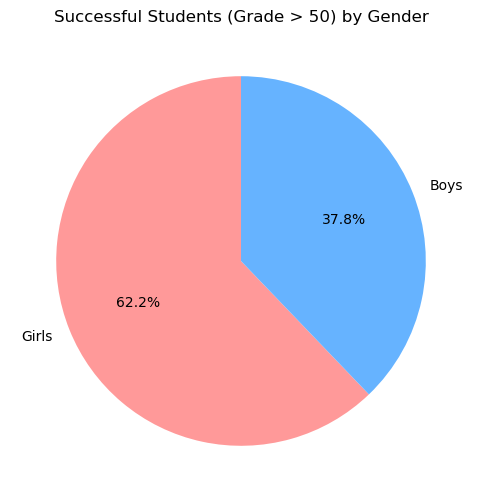

In [32]:

success_df = df[df['G3'] > 50]
success_counts = success_df['sex'].value_counts()
labels = ['Girls', 'Boys']
values = [success_counts.get('F', 0), success_counts.get('M', 0)]
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Successful Students (Grade > 50) by Gender')
plt.show()


<div dir="rtl" style="text-align: right;">
  <p>
    בנות מצליחות משמעותית יותר (62.2% לעומת 37.8%).
  </p>
  <p>
    מספר הבנות שמגיעות להצלחה גדול כמעט פי שניים ממספר הבנים.
  </p>
</div>


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> השפעת מערכות יחסים </h5>

</div>


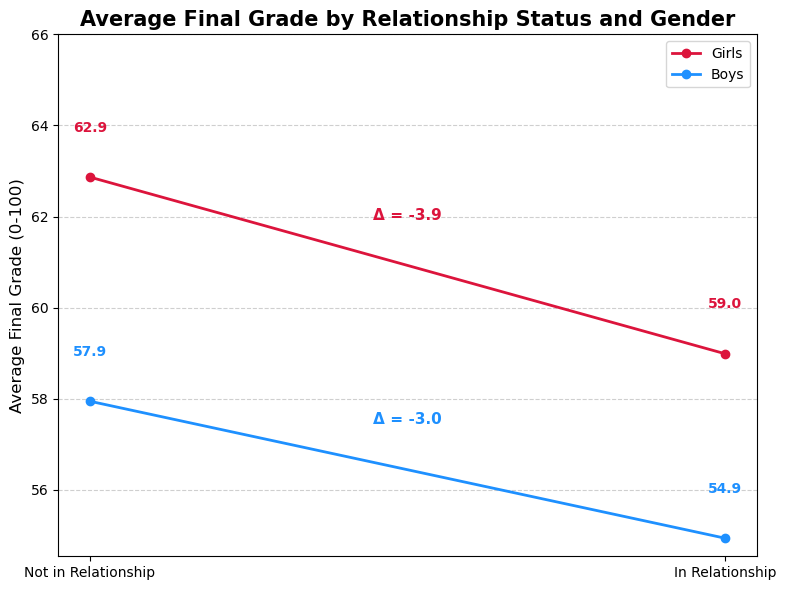

In [35]:
file_name = "https://raw.githubusercontent.com/yuval443/my_pro/refs/heads/main/student-por%20(1).csv"
df = pd.read_csv(file_name)
df['romantic'] = df['romantic'].fillna('no').astype(str).str.lower()
df['relationship_status'] = df['romantic'].map({'yes': 'In Relationship', 'no': 'Not in Relationship'})

# הכפלת ציוני G3 אם הם בטווח 0-20
if df['G3'].max() <= 20:
    df['G3'] = df['G3'] * 5

# שינוי עמודת מין מ-M/F ל-Boys/Girls (להבהרת הגרף)
df['gender_label'] = df['sex'].map({'F': 'Girls', 'M': 'Boys'})

# חישוב ממוצעים לפי מצב זוגי ומין
avg_scores = df.groupby(['relationship_status', 'gender_label'])['G3'].mean().unstack()

statuses = ['Not in Relationship', 'In Relationship']

plt.figure(figsize=(8, 6))

for gender, color in zip(['Girls', 'Boys'], ['crimson', 'dodgerblue']):
    if gender in avg_scores.columns:
        y_vals = avg_scores.loc[statuses, gender].values
        plt.plot(statuses, y_vals, marker='o', label=gender, color=color, linewidth=2)

        slope = y_vals[1] - y_vals[0]
        mid_x = 0.5
        mid_y = (y_vals[0] + y_vals[1]) / 2
        plt.text(mid_x, mid_y + 1, f"Δ = {slope:.1f}", color=color, fontsize=11, fontweight='bold', ha='center')

        for i, status in enumerate(statuses):
            plt.text(i, y_vals[i] + 1, f"{y_vals[i]:.1f}", ha='center', color=color, fontweight='bold')

plt.ylim(top=66)
plt.title('Average Final Grade by Relationship Status and Gender', fontsize=15, fontweight='bold')
plt.ylabel('Average Final Grade (0-100)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


נתונים מראים ירידה בציונים הן אצל בנים והן אצל בנות שנמצאים במערכת יחסים, כאשר הירידה אצל בנות גדולה יותר (3.9 נקודות לעומת 3.0). עם זאת, חשוב לזכור שמדובר בקורלציה ולא בהכרח בקשר סיבתי - ייתכן שגורמים נוספים כמו בגרות רגשית או ניהול זמן משפיעים על שני הפרמטרים יחד

<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> השפעת זמן פנוי</h5>

</div>


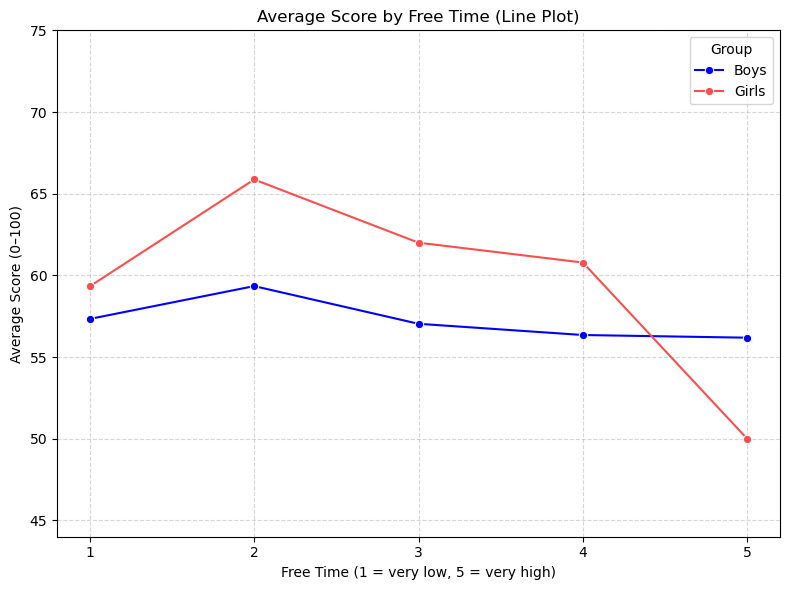

In [38]:


df['group'] = 'All Students'
df.loc[df['sex'] == 'F', 'group'] = 'Girls'
df.loc[df['sex'] == 'M', 'group'] = 'Boys'

grouped = df.groupby(['freetime', 'group'])['G3'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(
    data=grouped[grouped['group'].isin(['Girls', 'Boys'])],  # רק בנים ובנות
    x='freetime',
    y='G3',
    hue='group',
    marker='o',
    palette={'Girls': '#ff4d4d', 'Boys': 'blue'}  # אדום בהיר לבנות, כחול לבנים
)

plt.title("Average Score by Free Time (Line Plot)")
plt.xlabel("Free Time (1 = very low, 5 = very high)")
plt.ylabel("Average Score (0–100)")
plt.xticks([1, 2, 3, 4, 5])
plt.ylim(44,75)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Group")
plt.tight_layout()
plt.show()



הנתונים מראים דפוסים שונים בין המינים: בנות מגיעות לשיא הביצועים ברמת זמן פנוי בינונית (רמה 2) ואז יורדות בחדות ברמות גבוהות, בעוד שבנים נשארים יציבים יחסית בכל הרמות.

למרות כל הגורמים החברתיים שנבדקו - מערכות יחסים וזמן פנוי רב - בנות עדיין משיגות ציונים גבוהים יותר מבנים בכל התנאים. הפער הבסיסי בהצלחה לטובת הבנות נשמר גם כאשר הן נמצאות במערכות יחסים או עם זמן פנוי מרובה. ממצא זה מעיד על עמידות ויכולת התמודדות מרשימה של בנות עם אתגרים מרובים, ומעלה שאלות מעניינות לגבי הגורמים העמוקים יותר שתורמים להצלחתן האקדמית. עם זאת, עדיין נדרש מחקר נוסף להבנת הגורמים שמאפשרים לבנות לשמור על ביצועים גבוהים למרות הסחות דעת חברתיות.

<div dir="rtl" style="font-family: 'Calibri', serif; line-height: 1.1; white-space: nowrap;">

## <span style="color: #D68E6B; font-size: 31px; font-weight: bold;">שאלת ניתוח שלישית- מוטיבציה פנימית ללימודים והשלכותיה</span>

</div>
<div>
<center><img src="https://raw.githubusercontent.com/yuval443/my_pro/d909d7120728f5f99f7dbaee461b952c437c7faa/OIG1.jpg" width="500"/></center> 
</div>


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> ניבוי הצלחה וכישלון</h5>

</div


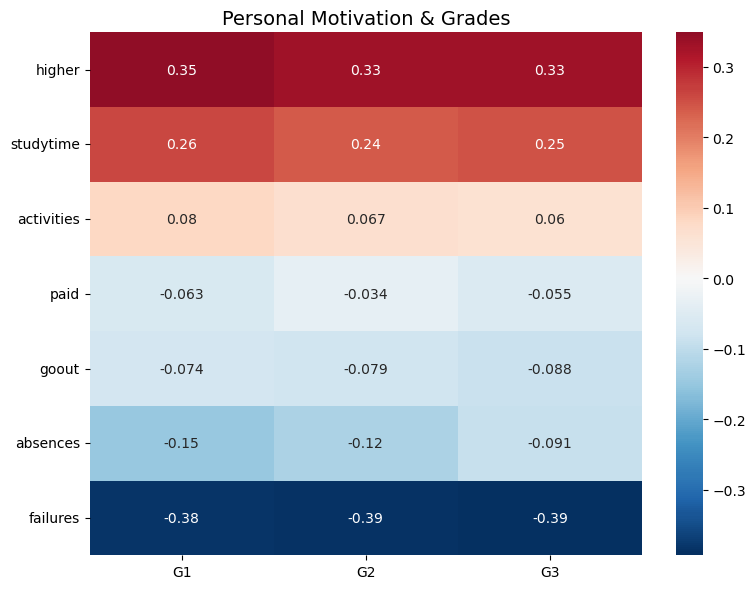

In [42]:

df_simple = df.copy()

for col in df_simple.columns:
    if df_simple[col].dtype == 'object' and set(df_simple[col].unique()) <= {'yes', 'no'}:
        df_simple[col] = df_simple[col].map({'yes': 1, 'no': 0})

personal_motivation = ['higher','studytime','activities', 'paid', 'goout', 'absences', 'failures']
grades = ['G1', 'G2', 'G3']


corr = df_simple[personal_motivation + grades].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr.loc[personal_motivation, grades], annot=True, cmap='RdBu_r', center=0)
plt.title('Personal Motivation & Grades', fontsize=14)
plt.tight_layout()
plt.show()


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> השפעת המוטיבציה</h5>

</div>


higher_label
Wants Higher Ed.           580
Doesn't Want Higher Ed.     69
Name: count, dtype: int64


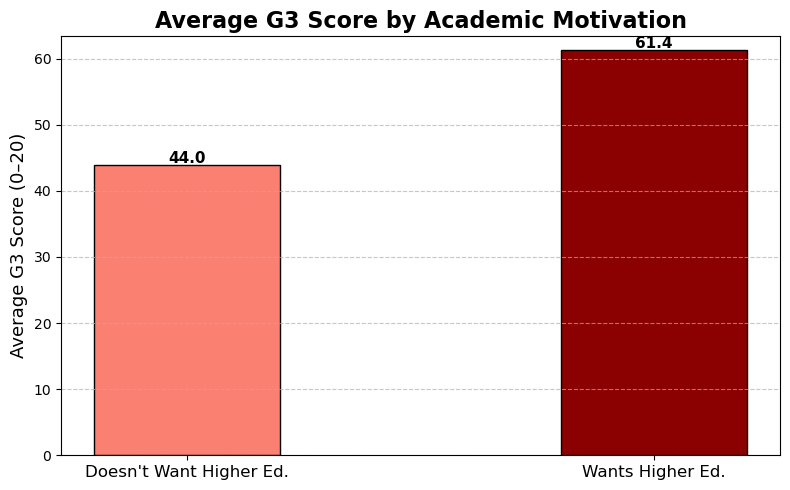

In [44]:
file_name = "https://raw.githubusercontent.com/yuval443/my_pro/refs/heads/main/student-por%20(1).csv"
df = pd.read_csv(file_name)
df.columns = df.columns.str.strip()

df['higher_label'] = df['higher'].map({'yes': 'Wants Higher Ed.', 'no': "Doesn't Want Higher Ed."})

print(df['higher_label'].value_counts(dropna=False))


avg_g3 = df.groupby('higher_label')['G3'].mean() *5

labels = avg_g3.index.tolist()
scores = avg_g3.values
colors = ['salmon', 'darkred']
x = np.arange(len(labels))
width = 0.4

plt.figure(figsize=(8, 5))
bars = plt.bar(x, scores, width=width, color=colors, edgecolor='black')

for i, val in enumerate(scores):
    plt.text(x[i], val + 0.3, f'{val:.1f}', ha='center', fontsize=11, fontweight='bold')

plt.xticks(x, labels, fontsize=12)
plt.title('Average G3 Score by Academic Motivation', fontsize=16, fontweight='bold')
plt.ylabel('Average G3 Score (0–20)', fontsize=13)
plt.ylim(0, max(scores) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Ilan\AppData\Local\Temp\ipykernel_10436\3857159628.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


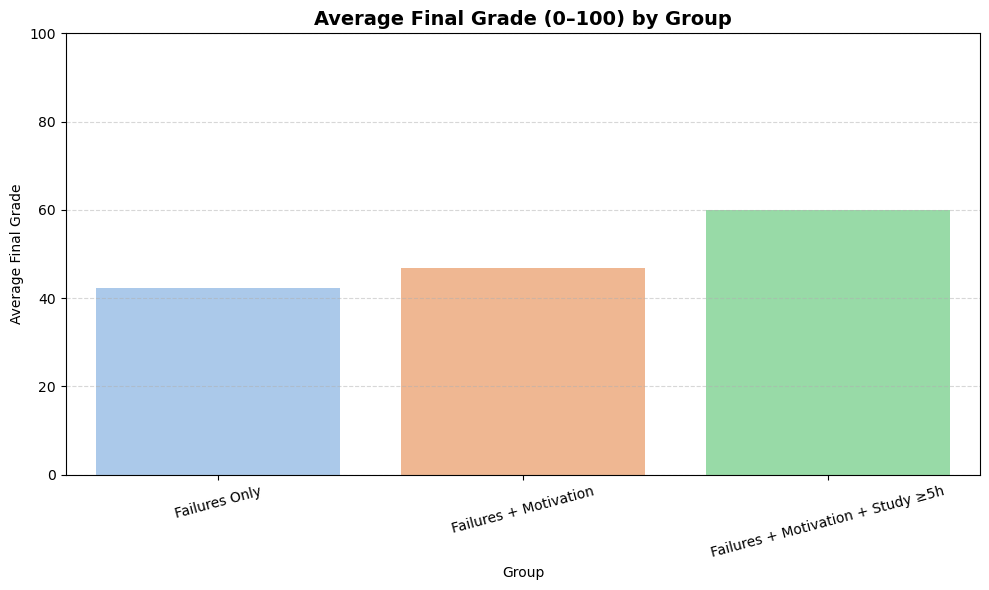

In [45]:
#file_name = "https://raw.githubusercontent.com/yuval443/my_pro/refs/heads/main/student-por%20(1).csv"
#df = pd.read_csv(file_name)
df1 = df[df['failures'] > 1].copy()
df1['Group'] = 'Failures Only'

df2 = df[(df['failures'] > 1) & (df['higher'] == 'yes')].copy()
df2['Group'] = 'Failures + Motivation'


df3 = df[(df['failures'] > 1) & (df['higher'] == 'yes') & (df['studytime'] >= 3)].copy()
df3['Group'] = 'Failures + Motivation + Study ≥5h'

combined_df = pd.concat([df1, df2, df3], ignore_index=True)
combined_df['G3_scaled'] = combined_df['G3']*5


group_stats = (
    combined_df.groupby('Group')
    .agg(Average_Grade=('G3_scaled', 'mean'), Count=('G3_scaled', 'count'))
    .reset_index()
    .sort_values(by='Average_Grade', ascending=True)
)


plt.figure(figsize=(10, 6))
sns.barplot(
    x='Group', 
    y='Average_Grade', 
    data=group_stats, 
    palette='pastel',
    order=group_stats['Group']
)

plt.title('Average Final Grade (0–100) by Group', fontsize=14, fontweight='bold')
plt.ylabel('Average Final Grade')
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



הגרף מראה עלייה דרגתית וברורה בציונים בהתאם לסוג ההתמודדות עם כשלונות: מ-42 נקודות אצל תלמידים שחווים כשלונות בלבד, דרך 47 נקודות אצל אלה שמשלבים מוטיבציה, ועד 60 נקודות אצל תלמידים שמשלבים גם לימוד מעמיק (מעל 5 שעות).


<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> גרף ההעדרויות יחד עם השקעת התלמידים</h5>

</div>


C:\Users\Ilan\AppData\Local\Temp\ipykernel_10436\2414361214.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby('absence_range').agg({
C:\Users\Ilan\AppData\Local\Temp\ipykernel_10436\2414361214.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, grouped['Avg_Grade'][i] + 1.5, f'n={txt}', ha='center', fontsize=10)
posx and posy should be finite values
posx and posy should be finite values


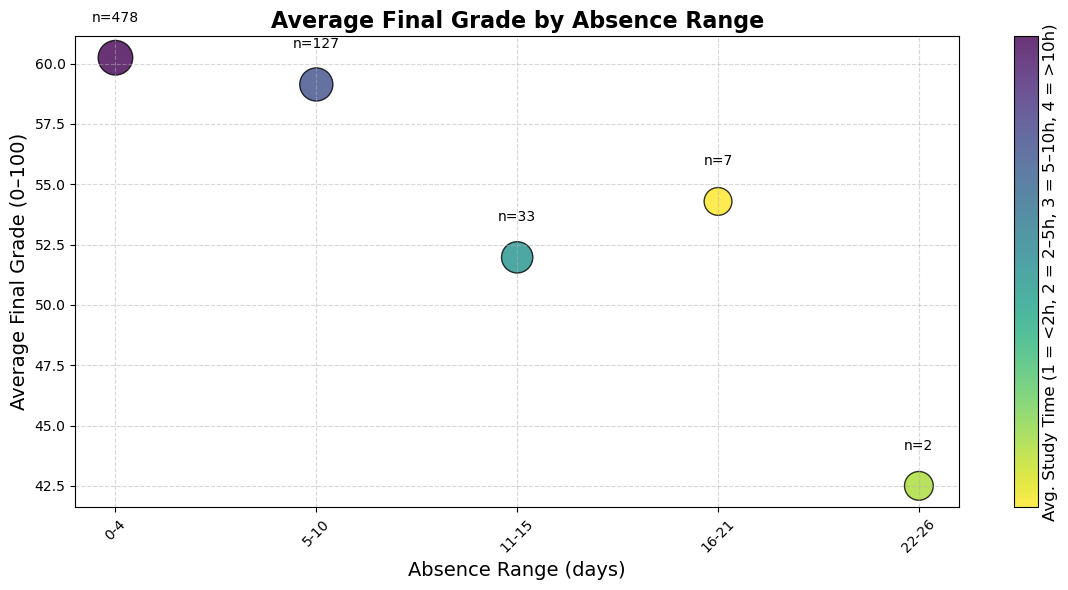

In [48]:

num_bins = 6
bins = np.linspace(df['absences'].min(), df['absences'].max() + 1, num_bins + 1)
labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(num_bins)]
labels[-1] = f'{int(bins[-2])}+'

df['absence_range'] = pd.cut(df['absences'], bins=bins, labels=labels, include_lowest=True)


valid_labels = labels[:-1]
filtered_df = df[df['absence_range'].isin(valid_labels)]


grouped = filtered_df.groupby('absence_range').agg({
    'G3': lambda x: (x.mean()) * 5,  
    'studytime': 'mean',
    'absences': 'count'
}).rename(columns={'absences': 'Count', 'G3': 'Avg_Grade', 'studytime': 'Avg_StudyTime'})


sizes = (grouped['Avg_StudyTime'] - grouped['Avg_StudyTime'].min() + 1) * 400
study_times = grouped['Avg_StudyTime']


plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    grouped.index, grouped['Avg_Grade'],
    s=sizes,
    c=study_times,
    cmap='viridis_r',
    alpha=0.8,
    edgecolors='k'
)

plt.xlabel('Absence Range (days)', fontsize=14)
plt.ylabel('Average Final Grade (0–100)', fontsize=14)
plt.title('Average Final Grade by Absence Range', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label('Avg. Study Time (1 = <2h, 2 = 2–5h, 3 = 5–10h, 4 = >10h)', fontsize=12)
cbar.set_ticks([])

plt.xticks(rotation=45)


for i, txt in enumerate(grouped['Count']):
    plt.text(i, grouped['Avg_Grade'][i] + 1.5, f'n={txt}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


הגרף מראה קשר בין מספר ימי היעדרות לבין הציונים, כאשר תלמידים עם היעדרויות מועטות (0-4 ימים) משיגים את הציונים הגבוהים ביותר (60 נקודות) ותלמידים עם היעדרויות רבות (22-26 ימים) משיגים את הציונים הנמוכים ביותר (43 נקודות). באופן מפתיע, ההשערה שתלמידים עם היעדרויות רבות יפצו בלימוד מרובה לא התממשה - דווקא התלמידים עם ההיעדרויות המועטות הם שלומדים הכי הרבה (מעל 10 שעות), בעוד אלה עם היעדרויות רבות לומדים הכי מעט.

ממצא זה עלול להצביע על כך שהיעדרויות הן סימן לחוסר מוטיבציה כללי ולא רק בעיה נקודתית שניתן לפצות עליה. עם זאת, חשוב לציין שגדלי המדגם משתנים מאוד - בעוד שלקבוצת ההיעדרויות המועטות יש 127 תלמידים, לקבוצת ההיעדרויות הרבות יש רק 2 תלמידים, מה שמקשה על הכללת הממצאים. בנוסף, ייתכן שהקשר הוא דו-כיווני - תלמידים מוטיבציים יותר גם נעדרים פחות וגם לומדים יותר, כך שההיעדרויות עשויות להיות סימפטום ולא הגורם לביצועים נמוכים.






<div dir="rtl" style="font-family: 'Calibri', sans-serif; line-height: 1.6; text-align: right;">

<h5 style="font-size: 24px"> שילוב חוגים עם זמן למידה</h5>

</div>


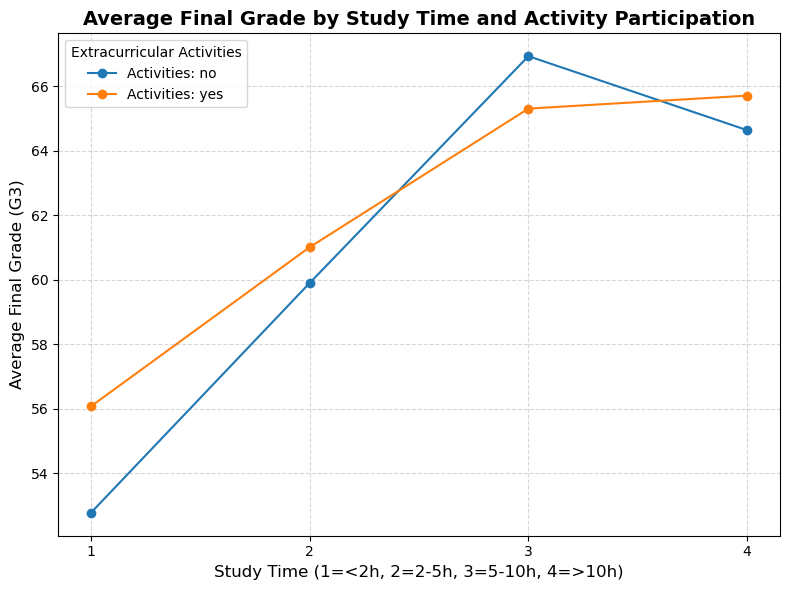

In [51]:

if df['G3'].max() <= 20:
    df['G3'] = df['G3'] * 5
df['G3'] = df['G3'].clip(0, 100)


grouped = df.groupby(['activities', 'studytime'])['G3'].mean().unstack()

plt.figure(figsize=(8,6))

for activity_status in grouped.index:
    plt.plot(grouped.columns, grouped.loc[activity_status], marker='o', label=f'Activities: {activity_status}')

plt.xlabel('Study Time (1=<2h, 2=2-5h, 3=5-10h, 4=>10h)', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.title('Average Final Grade by Study Time and Activity Participation', fontsize=14, fontweight='bold')
plt.xticks(grouped.columns)
plt.legend(title='Extracurricular Activities')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


הגרפים חושפים תמונה מורכבת של גורמי הצלחה אקדמית שמאתגרת הנחות בסיסיות. בעוד שהיינו מצפים שתלמידים עם יותר זמן פנוי (פחות פעילויות, יותר היעדרויות) ילמדו יותר ויפצו על החסך, המציאות מראה את ההפך - תלמידים מוטיבציים מצליחים בכל המישורים: נעדרים פחות, לומדים יותר, ומשתתפים בפעילויות נוספות תוך שמירה על ביצועים גבוהים.
הממצא המרכזי הוא שמוטיבציה ומשמעת עצמית הם הגורמים המכריעים - לא כמות הזמן הפנוי אלא איכות הניצול שלו. בנוסף, הגרפים מראים שניתן לכפר על כישלונות - גם תלמידים שחוו כשלונות במבחנים יכולים להגיע לציונים גבוהים אם הם משלבים מוטיבציה ולימוד מעמיק, מה שמעיד על חשיבות ההתמדה והצמיחה מתוך טעויות. עם זאת, יש להיזהר מהכללות מוקדמות בשל מגבלות גודל המדגם ואפשרות לקשרי סיבתיות הפוכים או גורמים נוספים שלא נבדקו.

<div dir="rtl" style="font-family: 'Calibri', serif; line-height: 1.1; white-space: nowrap;">

## <span style="color: #D68E6B; font-size: 31px; font-weight: bold;">סיכום החקר ומסקנות</span>

</div>


<div dir="rtl" style="font-family: 'Calibri', serif; line-height: 1.6; text-align: right;">

<p style="font-size: 24px; color: black;">
<ul style="list-style-type: disc; margin-right: 20px; font-size: 24px; margin-top: 0; margin-bottom: 0;">
  <li>בשאלה הראשונה ראינו כי תנאי מחיה של התלמיד אכן משפיעים על הצלחת התלמיד,ככול שלהורים יש השכלה גבוהה יותר והתלמיד גר קרוב יותר לבית ספר סיכויי ההצלחה שלו גדולים יותר.</li>
  <li>בנות מובילות בהצלחה לימודית (62.2% מהמצליחים) ושומרות על יתרון בכל התנאים. עם זאת, הן רגישות יותר לגורמים חברתיים - מערכות יחסים פוגעות בהן יותר  וזמן פנוי מרובה גורם לירידה חדה, בעוד בנים נשארים יציבים ברמה נמוכה יותר.</li>
  <li>מוטיבציה מהווה את הגורם המנבא החזק ביותר להצלחה - תלמידים בעלי מוטיבציה נעדרים פחות, לומדים יותר, משתתפים בפעילויות נוספות ומשיגים ציונים גבוהים יותר. מוטיבציה יכולה לכפר על כישלונות</li>
</ul>
</p>

</div>